<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-'clean_churn.csv'" data-toc-modified-id="Read-'clean_churn.csv'-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read 'clean_churn.csv'</a></span></li><li><span><a href="#XGBoost-Parameter-Hypertuning-&amp;-Grid-Search" data-toc-modified-id="XGBoost-Parameter-Hypertuning-&amp;-Grid-Search-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>XGBoost Parameter Hypertuning &amp; Grid Search</a></span></li></ul></div>

# XGBoost_Model Using 'clean_churn.csv'

## Read 'clean_churn.csv'

In [9]:
# Common Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import MultiIndex, Int16Dtype
import warnings
warnings.simplefilter(action='ignore', category='FutureWarning')
warnings.filterwarnings('ignore')

# SKLearn Libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score


In [14]:
filename = 'clean_churn.csv'
df = pd.read_csv('clean_churn.csv')

# Splitting the dataset features into X and y
df.drop(['Unnamed: 0', 'T_D_Min', 'T_E_Min', 'T_N_Min', 'T_I_Min'],
        axis=1,
        inplace=True)

x = df.drop(['Churned'], axis=1)
y = df.Churned

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)

print('\nFile name of run =\033[1m', filename, '\033[0m \n')

print(55 * '=', '\n')


File name of run = clean_churn.csv  




## XGBoost Parameter Hypertuning & Grid Search

- For current information see: https://xgboost.readthedocs.io/en/stable/parameter.html


'n_estimators':[50,100,150],
    'reg_lambda':[2,1],
    'gamma':[0,0.3,0.2,0.1],
    'eta':[0.06,0.05,0.04],
    'max_depth':[3,5],
    'objective':['binary:logistic'],
    'learning_rate': [0.10, 0.5, 1],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.2, 0.5],
    'colsample_bytree': [0.3, 0.6, 0.9]

In [6]:
import time

start = time.perf_counter()

grid = [{
    'n_estimators': [50, 100, 150],
    'reg_lambda': [2, 1],
    'gamma': [0, 0.31, 0.1],
    'eta': [0.04, 0.07, 0.01],
    'objective': ['binary:logistic'],
    'learning_rate': [0.1, 0.5, 0.1],
    'max_depth': [5, 7, 9, 11],
}]

xgbc_search = GridSearchCV(
    estimator=XGBClassifier(verbose=0, use_label_encoder=False),
    param_grid=grid,
    scoring='accuracy',
    n_jobs=7,
    cv=3)

# I hope that this holds error warnings
HOLD = xgbc_search.fit(x_train, y_train)

#print(f'\nDetermined grid search in {time.perf_counter() - start:0.4f} seconds.')

/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[13:31:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:31:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mista

/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed fro

[13:31:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:31:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:31:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mista

/home/mcc/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:35:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:35:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
import time

print(f'\nDetermined grid search in {time.perf_counter() - start:0.4f} seconds.')

print('\nBest hyperparameters:', xgbc_search.best_params_)
print('\nAccuracy:', xgbc_search.best_score_)


Determined grid search in 24.2325 seconds.

Best hyperparameters: {'eta': 0.06, 'gamma': 0.2, 'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50, 'objective': 'binary:logistic', 'reg_lambda': 2}

Accuracy: 0.9544


[13:31:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[[1058   17]
 [  49  126]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1075
           1       0.88      0.72      0.79       175

    accuracy                           0.95      1250
   macro avg       0.92      0.85      0.88      1250
weighted avg       0.95      0.95      0.94      1250


Run time 0.2348 seconds.


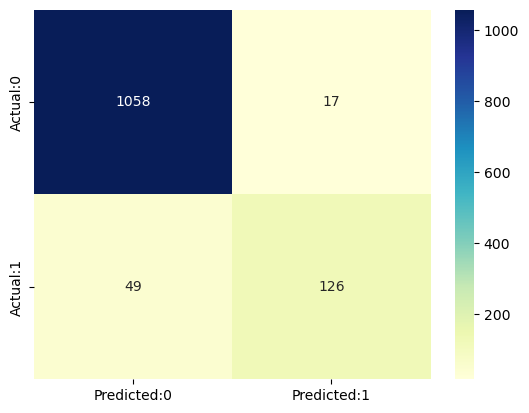

In [5]:
import time
start = time.perf_counter()

rf_class = XGBClassifier(eta=0.06, 
                         gamma=0.2, 
                         learning_rate=0.5, 
                         max_depth=5, 
                         n_estimators=100, 
                         objective='binary:logistic', 
                         reg_lambda=1,
                         n_jobs=10)

rf_class.fit(x_train, y_train)

y_pred = rf_class.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

print('\n')
print(25*'=')
print(confusion_matrix(y_test, y_pred))
print(25*'=')
print(classification_report(y_test, y_pred))
print(25*'=')

print(f'\nRun time {time.perf_counter() - start:0.4f} seconds.')